<a href="https://www.kaggle.com/code/ankumagawa/movie-sentiment-analysis-with-tf-idf-naive-bayes?scriptVersionId=99900601" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/imdb-dataset-of-50k-movie-reviews/IMDB Dataset.csv


In [2]:
import pandas as pd
import seaborn as sns

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer  
stop_words = stopwords.words('english')

import re

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.naive_bayes import MultinomialNB

# 1. UNDERSTAND THE DATA: 


In [3]:
# import data:

df=pd.read_csv('../input/imdb-dataset-of-50k-movie-reviews/IMDB Dataset.csv')
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [4]:
# number of observation and features:
df.shape

(50000, 2)

In [5]:
# data info:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


<AxesSubplot:>

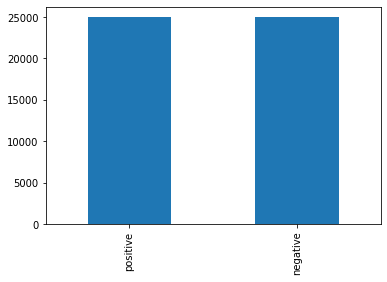

In [6]:
# check the balance of sentiment feature:
df['sentiment'].value_counts().plot(kind='bar')

In [7]:
# one-hot encoding: 

df= pd.get_dummies(df, columns= ['sentiment'],drop_first= True)

In [8]:
df.head()

,review,sentiment_positive
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1


# 2) Data Preprocessing: 

In [9]:
# remove url
# remove html tags
# remove punctuations
# remove stopwords
# remove emoji
# lemmatization

In [10]:
sw = stopwords.words('english')
lemmatizer = WordNetLemmatizer() 

def cleantext(text):
    text= text.lower()
    text= re.sub(r"[^a-zA-Z?.!,¿]+", " ", text)
    text= re.sub(r"http\S+", "",text)
    text= re.sub(r"http", "",text)
    
    punctuations= '@#!?+&*[]-%.:/();$=><|{}^' + "'`" + '_'
    for p in punctuations:
        text= text.replace(p, '')
        
    text= [word.lower() for word in text.split() if word.lower() not in sw]
    
    text= [lemmatizer.lemmatize(word) for word in text]
    
    text = " ".join(text)
    
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  
                           u"\U0001F300-\U0001F5FF"  
                           u"\U0001F680-\U0001F6FF"  
                           u"\U0001F1E0-\U0001F1FF"  
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    
    text= emoji_pattern.sub(r'',text)
    
    return text

In [11]:
df['review'] = df['review'].apply(lambda x: cleantext(x))
 
df.head()

,review,sentiment_positive
0,one reviewer mentioned watching oz episode hoo...,1
1,wonderful little production br br filming tech...,1
2,thought wonderful way spend time hot summer we...,1
3,basically family little boy jake think zombie ...,0
4,petter mattei love time money visually stunnin...,1


# 3) Train-test Split: 

In [12]:
X= df['review']
y= df['sentiment_positive']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 26)

# 4) TF-IDF Vectorization

In [13]:
tfidf_vectorizer = TfidfVectorizer() 

tfidf_train_vectors = tfidf_vectorizer.fit_transform(X_train) #applying tf idf to training data

tfidf_test_vectors = tfidf_vectorizer.transform(X_test) #applying tf idf to training data

In [14]:
# check the dimension of the data now: 
print("n_samples: %d, n_features: %d" % tfidf_train_vectors.shape)

n_samples: 40000, n_features: 97488


# 5) Naive Bayes Classifier

I'll use Multinomial Naive Bayes for this model. 

Multinomial Naive Bayes has many industries and commercial applications in the field of Natural Language Processing.

In [15]:
#naive bayes classifier
naive_bayes_classifier = MultinomialNB()

naive_bayes_classifier.fit(tfidf_train_vectors, y_train)

MultinomialNB()

In [16]:
#predicted y
y_pred = naive_bayes_classifier.predict(tfidf_test_vectors)


In [17]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.87      0.87      5067
           1       0.87      0.86      0.86      4933

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000



In [18]:
cnf_matrix = confusion_matrix(y_test,y_pred)

cnf_matrix

array([[4432,  635],
       [ 702, 4231]])

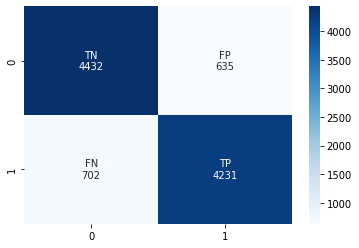

In [19]:

group_names = ['TN','FP','FN','TP']
group_counts = ["{0:0.0f}".format(value) for value in cnf_matrix.flatten()]
labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_names,group_counts)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cnf_matrix, annot=labels, fmt='', cmap='Blues');
